<a href="https://colab.research.google.com/github/anaprataa/portfolio/blob/main/analise_dados_airbnb_munique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise dos Dados do Airbnb - Munique, Alemanha**

#### **Autora**: Ana Luiza Prata

###### *Estudante de Engenharia Química na UFRRJ e aluna DSNP na [sigmoidal.ai](https://sigmoidal.ai)*

---

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

## **Oktoberfest**

A Oktoberfest é o maior festival do mundo, recebendo cerca de seis milhões de visitantes anualmente em Munique (Alemanha).

Tal festividade ocorre desde 1810 quando foi criado em celebração ao casamento do rei bavário Luís I. Ela acontece no parque ***Theresienwiese***, batizado em homenagem à noiva. A festa fez tanto sucesso que o rei ordenou a sua repetição e desde então ocorre todo ano.

Pessoas do mundo inteiro viajam para a Oktoberfest para consumir as cervejas [***Märzen***](https://www.oktoberfest.net/cerveja-oktoberfest/) produzidas pelas 6 tradicionais fábricas de cerveja de Munique. Além das cervejas, o evento também é recheado de atrações musicais e feiras.

<center><img alt="Oktoberfest" width="50%" src="https://simonde.com.br/wp-content/uploads/2018/08/u-by-uniworld-oktoberfest-10-dicas-para-aproveitar-o-melhor-munique-alemanha-munich-1200-5.jpg"></center>

## **Cenário**

Neste projeto, iremos considerar uma situação hipotética como forma de mostrar que a análise de dados pode ser aplicada em benefício não somente das tomadas de decisão em empresas, mas também na hora de planejar uma viagem. Por que não?

Uma dupla de amigas de trabalho estão prestes a sair de férias e decidiram que gostariam de viajar para a Alemanha e conhecer a Oktoberfest. O objetivo delas é visitar o evento durante dois dias seguidos, então será necessário arrumar hospedagem para quatro dias.

Como o valor do euro é alto, elas precisam escolher dentre todas as opções que existem no app do Airbnb, aquela que melhor combina custo de hospedagem com distância até o evento, já que também podem existir gastos com deslocamento.

Em vista desses critérios, iremos analisar os dados mencionados anteriormente e propôr uma solução para esse impasse.

## **Objetivo**

Neste *notebook*, iremos analisar os dados referentes à cidade de Munique (Alemanha) e determinar qual o melhor Airbnb em termos de custo-benefício. Quando falamos de custo-benefício, significa que queremos encontrar o imóvel que melhor combina valor de hospedagem com distância até o evento. Além disso, iremos ver quais insights a mais podem ser extraídos a partir desses dados.

## **Obtenção dos Dados**


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/anaprataa/portfolio/main/Dados%20do%20Airbnb%20-%20Munique/listings.csv')

## **Análise dos Dados**


Antes de iniciar qualquer análise, vamos verificar o conteúdo do nosso *dataset*, analisando as 5 primeiras linhas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,97945,Deluxw-Apartm. with roof terrace,517685,Angelika,NaN,Hadern,48.11492,11.48954,Entire home/apt,80,2,129,2019-09-30,1.17,2,3
1,114695,Apartment Munich/East with sundeck,581737,Stephan,NaN,Berg am Laim,48.12071,11.63758,Entire home/apt,95,2,53,2019-10-03,0.50,2,99
2,127383,City apartment next to Pinakothek,630556,Sonja,NaN,Maxvorstadt,48.15199,11.56482,Entire home/apt,99,2,95,2020-08-16,1.04,1,3
3,159634,"Fancy, bright central roof top flat",765694,Sanna,NaN,Pasing-Obermenzing,48.13855,11.46586,Entire home/apt,52,5,34,2019-06-24,0.37,1,0
4,170154,"Own floor & bath, parking & breakfast",108297,Alex,NaN,Sendling-Westpark,48.10814,11.52733,Private room,55,2,480,2020-03-04,4.54,1,211


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print("O dataset possui {} linhas e {} colunas.".format(df.shape[0], df.shape[1]))

print()

# verificar os tipos de cada variável
df.dtypes

O dataset possui 5039 linhas e 16 colunas.



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Podemos perceber que existem **16 variáveis** nesse dataset. Suas descrições estão contidas na tabela abaixo.

| Variável | Descrição |
|---|---|
|**id**|Número de identificação do imóvel.|
|**name**|Nome do imóvel anunciado.|
|**host_id**|Número de identificação do proprietário do imóvel.|
|**host_name**|Nome do proprietário.|
|**neighbourhood_group**|Coluna vazia.|
|**neighbourhood**|Nome do bairro.|
|**latitude**|Coordenada da latitude da propriedade.|
|**longitude**|Coordenada da longitude da propriedade.|
|**room_type**|Tipo de acomodação que é oferecida.|
|**price**|Valor do alugel (em euros) por noite.|
|**minimum_nights**|Número mínimo de noites a serem reservadas.|
|**number_of_reviews**|Número total de avaliações da propriedade.|
|**last_review**|Data da última avaliação.|
|**reviews_per_month**|Quantidade de avaliações recebidas por mês.|
|**calculated_host_listings_count**|Número de imóveis anunciados do mesmo anfitrião.|
|**availability_365**|Número de dias disponíveis no período de um ano.|

Para esse projeto, as variáveis de interesse são: `id`, `name`, `host_name`, `neighbourhood`, `latitude`, `longitude`, `room_type`, `price` e `minimum_nights`. Todas elas estão com seus tipos dentro do adequado, como mostrado acima.

In [ ]:
# tipos de acomodações
df.room_type.value_counts()

Entire home/apt    2874
Private room       2034
Shared room          76
Hotel room           55
Name: room_type, dtype: int64

In [ ]:
# bairros
df.neighbourhood.value_counts()

Ludwigsvorstadt-Isarvorstadt                              564
Maxvorstadt                                               409
Schwabing-West                                            371
Schwabing-Freimann                                        300
Au-Haidhausen                                             296
Neuhausen-Nymphenburg                                     288
Bogenhausen                                               252
Ramersdorf-Perlach                                        212
Milbertshofen-Am Hart                                     209
Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln    205
Sendling-Westpark                                         197
Obergiesing                                               190
Tudering-Riem                                             181
Sendling                                                  178
Altstadt-Lehel                                            173
Schwanthalerhöhe                                          172
Untergie

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Aqui podemos perceber que existem sim dados faltantes nesse dataset. Mas...

> #### **Será que esses valores nulos serão um problema para o nosso objetivo de análise?**

Dois pontos devem ser avaliados:

- Para `reviews_per_month` e `last_review` percebemos que há uma porcentagem elevada de dados faltantes, totalizando **25,24%**. No entanto, essa variável pouco importa para a análise estratégica que foi colocada como objetivo. Portanto, essas colunas podem ser apenas deletadas.

- Já `host_name` e `name` são sim relevantes para a nossa conclusão final, já que além de identificar qual o melhor bairro em termos de custo-benefício, também podemos ser mais específicos e apontar o melhor imóvel/host. Como as porcentagens de dados faltantes para essas variáveis são baixas (**0,04% e 0,02%**), podemos excluir essas linhas, sem comprometer a qualidade dos nossos futuros resultados.

Além do exposto acima, também notamos que a coluna `neighbourhood_group` está totalmente vazia, podendo ser excluída.


In [ ]:
# porcentagem de valores ausentes para cada variável
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

neighbourhood_group               100.000000
reviews_per_month                  25.243104
last_review                        25.243104
host_name                           0.039690
name                                0.019845
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

In [ ]:
# copiando o dataset original
df_clean = df.copy()

# eliminando colunas indesejadas
df_clean.drop(['neighbourhood_group', 'reviews_per_month', 'last_review', 'availability_365', 'calculated_host_listings_count', 'number_of_reviews'], axis=1, inplace=True)

# eliminando linhas com valores nulos
df_clean.dropna(subset=['host_name', 'name'], inplace=True)

In [ ]:
# avaliando antes e depois
print('Número de linhas antes: {}'.format(df.shape[0]))
print('Número de linhas depois: {}'.format(df_clean.shape[0]))

Número de linhas antes: 5039
Número de linhas depois: 5036


In [ ]:
# exibir novo dataset
df_clean.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights
0,97945,Deluxw-Apartm. with roof terrace,517685,Angelika,Hadern,48.11492,11.48954,Entire home/apt,80,2
1,114695,Apartment Munich/East with sundeck,581737,Stephan,Berg am Laim,48.12071,11.63758,Entire home/apt,95,2
2,127383,City apartment next to Pinakothek,630556,Sonja,Maxvorstadt,48.15199,11.56482,Entire home/apt,99,2
3,159634,"Fancy, bright central roof top flat",765694,Sanna,Pasing-Obermenzing,48.13855,11.46586,Entire home/apt,52,5
4,170154,"Own floor & bath, parking & breakfast",108297,Alex,Sendling-Westpark,48.10814,11.52733,Private room,55,2


### **Q3. Como essas variáveis se comportam?**

Olhando para os principais atributos, é possível perceber que para `price` e `minimum_nights` existe uma presença marcante de outliers.

Vemos que existem valores muito fora daqueles observados em maioria para essas variáveis. Em `price` existem imóveis que chegam a custar 12.000 euros! Já para `minimum_nights`, alguns valores chegam a passar dos 400 dias.

Todos esses dados discrepantes estão fora da realidade da nossa dupla de turistas.

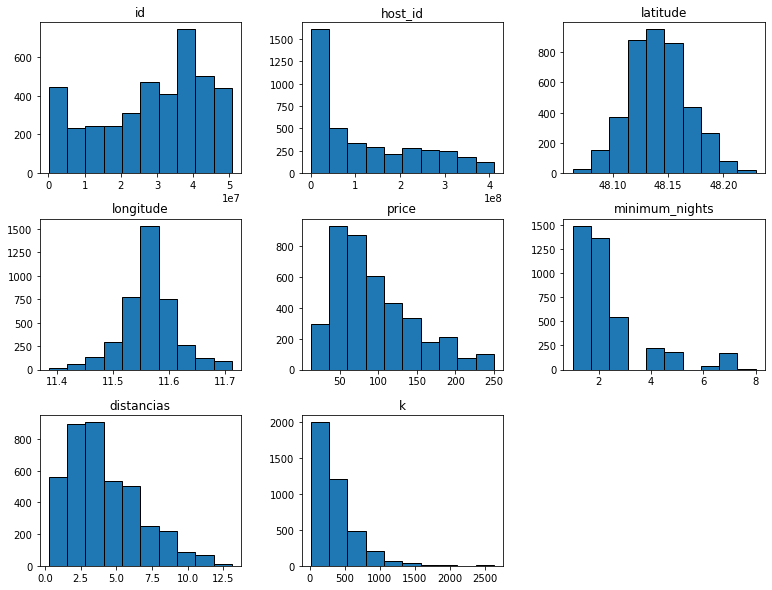

In [ ]:
# plotar o histograma das variáveis numéricas
df_clean.hist(grid=False ,figsize=(13,10), ec='black');

#### **Lidando com os outliers**

Como forma de lapidar os nossos dados e trazer eles para mais perto da realidade que queremos explorar, vamos entender como esses outliers estão impactando em nossas métricas e o que podemos fazer com eles.

Logo na tabela seguinte podemos ver que para `price` e `minimum_nights` os valores de média e mediana (50%) estão consideravelmente distantes, reforçando o impacto desses outliers.

In [ ]:
# tabela de estatísticas
df_clean.describe()

,id,host_id,latitude,longitude,price,minimum_nights
count,5.036000e+03,5.036000e+03,5036.000000,5036.000000,5036.000000,5036.000000
mean,2.868095e+07,1.193476e+08,48.140659,11.565586,118.521048,8.445393
std,1.484000e+07,1.199491e+08,0.026334,0.046757,269.944353,27.684146
min,9.794500e+04,3.735400e+04,48.063530,11.385190,0.000000,1.000000
25%,1.734938e+07,1.635914e+07,48.122703,11.539987,50.000000,1.000000
50%,3.170562e+07,6.712316e+07,48.137663,11.565890,80.000000,2.000000
75%,4.034995e+07,2.147751e+08,48.158372,11.587203,130.000000,4.000000
max,5.072065e+07,4.098239e+08,48.229500,11.711980,11999.000000,800.000000


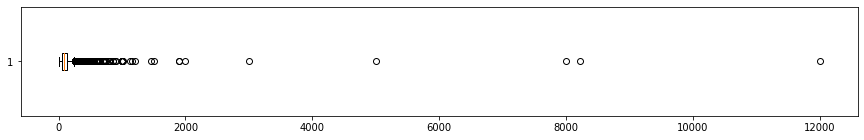

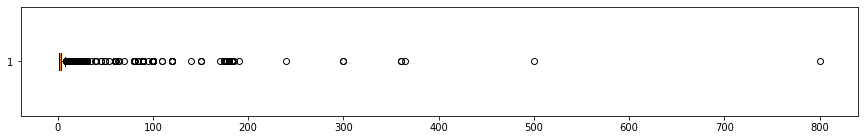

In [ ]:
# plotando o boxplot
plt.figure('Boxplot Price', figsize=(15,2))
plt.boxplot(x=df_clean['price'], vert=False);

plt.figure('Boxplot Minimum Nights', figsize=(15,2))
plt.boxplot(x=df_clean['minimum_nights'], vert=False);

**Critério IQR Score**

Usaremos esse método como forma de identificar esses outliers e eliminá-los. 

Seu passo a passo é o seguinte:
- Cálculo do range entre o primeiro e terceiro quartil.

 **IQR = Q3 - Q1**
- Cálculo dos limites superior e inferior.

 **limite inferior = Q1 - 1,5xIQR**
 
 **limite inferior = Q3 + 1,5xIQR**
- Identificar valores que extrapolam esses limites.
- Remover outliers

In [ ]:
# cálulo do IQR para price e minimum_nights
iqr_price = df_clean.price.quantile(.75) - df_clean.price.quantile(.25)
iqr_min_n = df_clean.minimum_nights.quantile(.75) - df_clean.minimum_nights.quantile(.25)

# definindo os limites
sup_price = df_clean.price.quantile(.75) + 1.5*iqr_price
inf_price = df_clean.price.quantile(.25) - 1.5*iqr_price

sup_min_n = df_clean.minimum_nights.quantile(.75) + 1.5*iqr_min_n
inf_min_n = df_clean.minimum_nights.quantile(.25) - 1.5*iqr_min_n

# exibindo resultado
print('Para price: IRQ = {}, sup_price = {} e inf_price = {}'.format(iqr_price, sup_price, inf_price))
print('Para minimum_nights: IQR = {}, sup_min_n = {} e inf_min_n = {}'.format(iqr_min_n, sup_min_n, inf_min_n))

Para price: IRQ = 80.0, sup_price = 250.0 e inf_price = -70.0
Para minimum_nights: IQR = 3.0, sup_min_n = 8.5 e inf_min_n = -3.5


Como sabemos, valores negativos para `price` e `minimum_nights` não são possíveis, por isso iremos considerar que o nosso **limite inferior será aberto em zero**, já que imóveis com valor zero para essas variáveis não fazem sentido.

In [ ]:
# contabilizando outliers
count_sup_price = (df_clean['price'] > sup_price).value_counts()[1]
count_inf_price = (df_clean['price'] == 0).value_counts()[1]
count_sup_mn = (df_clean['minimum_nights'] > sup_min_n).value_counts()[1]

# resultado
print(f"A varável price possui {count_sup_price+count_inf_price} outliers.\n")
print(f"A varável minimum_nights possui {count_sup_mn} outliers.\n")

# shape de df_clean
df_clean.shape

A varável price possui 324 outliers.

A varável minimum_nights possui 692 outliers.



(5036, 10)

In [ ]:
# eliminando outliers
df_clean.drop(df_clean[df_clean.price > sup_price].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > sup_min_n].index, axis=0, inplace=True)

# verificando novo shape de df_clean
df_clean.shape

(4031, 10)

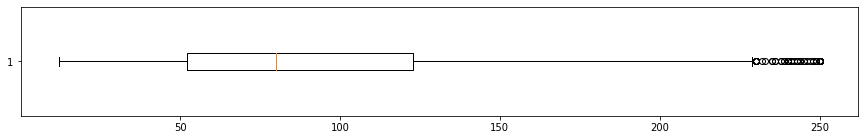

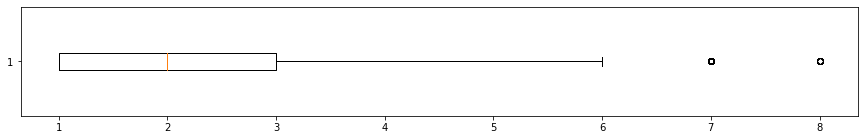

In [ ]:
# plotando o boxplot do dataset limpo
plt.figure('Boxplot Price', figsize=(15,2))
plt.boxplot(x=df_clean['price'], vert=False);

plt.figure('Boxplot Minimum Nights', figsize=(15,2))
plt.boxplot(x=df_clean['minimum_nights'], vert=False);

In [ ]:
# estatística dos dados tratados
df_clean.describe()

,id,host_id,latitude,longitude,price,minimum_nights
count,4.031000e+03,4.031000e+03,4031.000000,4031.000000,4031.000000,4031.000000
mean,2.860618e+07,1.201016e+08,48.141137,11.565637,94.465145,2.278095
std,1.471174e+07,1.188932e+08,0.026651,0.047514,52.657701,1.542392
min,9.794500e+04,3.735400e+04,48.063530,11.385190,12.000000,1.000000
25%,1.778180e+07,1.803457e+07,48.123115,11.540467,52.000000,1.000000
50%,3.155024e+07,7.153995e+07,48.137940,11.566440,80.000000,2.000000
75%,3.974551e+07,2.160649e+08,48.159110,11.587615,123.000000,3.000000
max,5.072065e+07,4.098239e+08,48.229500,11.711980,250.000000,8.000000


Após a limpeza, notamos que foram perdidas cerca de **20%** das linhas do nosso dataset `df_clean`. Esse valor representa sim uma grande perda de dados. No entando, em vista da análise simples que objetivamos fazer, não haverá comprometimento da qualidade do resultado final.

### **Q4. Qual a média dos preços de aluguel? Quais os bairros mais caros e mais baratos?**

Com esse valor médio global de 94,00 euros conseguimos ter um referêncial para a escolha do imóvel. Além disso, podemos ver que a média de valor por bairros mais baratos está bem abaixo da média global, ou seja, esses bairros são fortes candidatos à escolha final.

In [ ]:
# ver a média da coluna `price``
df_clean.price.mean()

94.4651451252791

In [ ]:
# ver a média da coluna `price` agrupada por bairros mais baratos
df_clean.groupby(['neighbourhood']).price.mean().sort_values()[:5]

neighbourhood
Hadern                    74.260870
Feldmoching-Hasenbergl    76.474576
Pasing-Obermenzing        76.981308
Milbertshofen-Am Hart     77.964072
Sendling-Westpark         78.770370
Name: price, dtype: float64

In [ ]:
# ver a média da coluna `price` agrupada por bairros mais caros
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:5]

neighbourhood
Altstadt-Lehel                  136.548872
Ludwigsvorstadt-Isarvorstadt    112.338747
Schwanthalerhöhe                109.340426
Maxvorstadt                     107.611111
Au-Haidhausen                    97.189300
Name: price, dtype: float64

### **Q5. Qual a real distância dos imóveis até a Oktoberfest?**

Como dito no início do projeto, não queremos apenas descobrir qual é o imóvel mais barato, mas sim aquele que melhor combina custos de hospedagem com o de deslocamento.
Para saber o valor dessas distâncias, dispomos das coordenadas de cada anúncio. Basta descobrirmos o valor das coordenadas do local do evento e calcular as distâncias. Vamos lá!

Sabemos que desde a sua origem, o evento ocorre no mesmo local, no parque Theresienwiese. Com uma rápida pesquisa no Google Maps podemos descobrir as coordenadas desse local **(48.1333, 11.5500)**.

![](https://github.com/anaprataa/portfolio/blob/main/Dados%20do%20Airbnb%20-%20Munique/theresienwiese.png?raw=true)

Agora, para o cálculo das distâncias iremos utilizar a **fórmula de Haversine**, uma equação muito utilizada em navegação que nos fornece uma boa base dessas distâncias.

Para saber mais sobre Haversine e o cálculo de distâncias entre dois pontos através da linguagem de programação SQL e Python acesse esse [LINK](https://kanoki.org/2019/02/14/how-to-find-distance-between-two-points-based-on-latitude-and-longitude-using-python-and-sql/).

In [ ]:
for i, j in [[df_clean.latitude, df_clean.longitude]]:

  # coordenadas do evento (em radianos)
  lat1 = 48.1333 * pi / 180
  lon1 = 11.5500 * pi / 180 
  # coordenadas do imóvel (em radianos)
  lat2 = i * pi /180
  lon2 = j * pi /180

  # calculo da distância em quilômetros
  d = (np.arccos(np.cos(lat1)*np.cos(lon1)*np.cos(lat2)*np.cos(lon2)+np.cos(lat1)*np.sin(lon1)*np.cos(lat2)*np.sin(lon2)+np.sin(lat1)*np.sin(lat2))*6371)

  # armazenamento dos valores
  distancias = np.array(d)

In [ ]:
# criando a coluna 'distancias' no dataframe
df_clean['distancias'] = distancias

# exibir resultado
df_clean.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,distancias
0,97945,Deluxw-Apartm. with roof terrace,517685,Angelika,Hadern,48.11492,11.48954,Entire home/apt,80,2,4.931103
1,114695,Apartment Munich/East with sundeck,581737,Stephan,Berg am Laim,48.12071,11.63758,Entire home/apt,95,2,6.649281
2,127383,City apartment next to Pinakothek,630556,Sonja,Maxvorstadt,48.15199,11.56482,Entire home/apt,99,2,2.351213
3,159634,"Fancy, bright central roof top flat",765694,Sanna,Pasing-Obermenzing,48.13855,11.46586,Entire home/apt,52,5,6.271065
4,170154,"Own floor & bath, parking & breakfast",108297,Alex,Sendling-Westpark,48.10814,11.52733,Private room,55,2,3.264766


**Perfekt!**

Agora vamos dar uma olhada melhor na distribuição dessas distâncias.

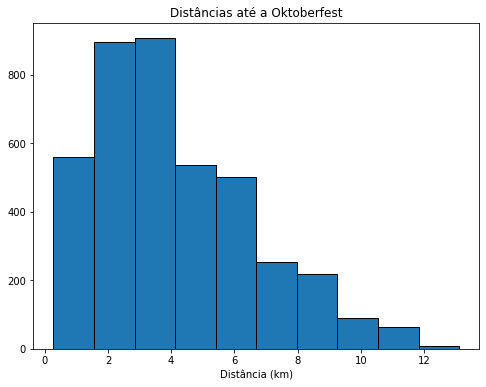

In [ ]:
# histograma das distâncias
df_clean['distancias'].hist(figsize = [8, 6], grid=False, ec='black');
plt.title('Distâncias até a Oktoberfest');
plt.xlabel('Distância (km)');

In [ ]:
# estatísticas
df_clean['distancias'].describe()

count    4031.000000
mean        4.130459
std         2.501197
min         0.273119
25%         2.284521
50%         3.593357
75%         5.721747
max        13.112109
Name: distancias, dtype: float64

### **Q6. Qual a correlação existente entre as variáveis?**

Como esperado, a variável `price` possui uma relação inversa com `distancias`. Imóveis mais distantes de pontos turísticos relevantes tendem a demandar um custo menor com hospedagem. No entanto, nesse nosso caso, essa influência não pode ser considerada forte ou significativa, já que esses valores de correlação estão mais próximos de 0 do que de 1 ou -1.

,price,minimum_nights,distancias
price,1.000000,-0.030138,-0.178078
minimum_nights,-0.030138,1.000000,-0.017223
distancias,-0.178078,-0.017223,1.000000


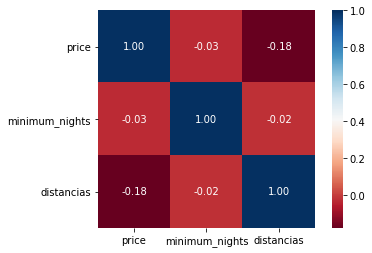

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'distancias']].corr()

# mostrar a matriz de correlação
display(corr)

# mostrar heatmap de corr
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

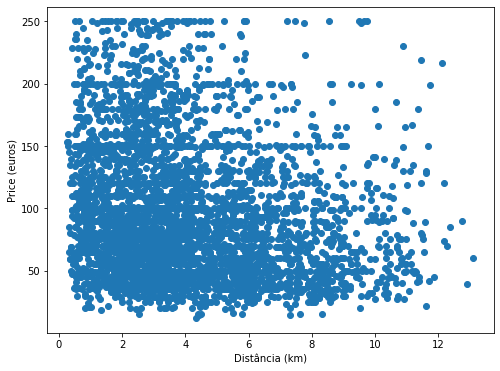

In [ ]:
# gráfico de dispersão
plt.figure(figsize=[8, 6]);
plt.scatter(df_clean['distancias'], df_clean['price']);
plt.xlabel('Distância (km)');
plt.ylabel('Price (euros)');

### **Q7. Qual o melhor imóvel?**

Vamos começar olhando quais bairros ficam mais próximos do evento.

Se compararmos a lista dos cinco bairros mais baratos obtidos anteriormente com a nossa nova lista de bairros mais próximos da Oktoberfest, notaremos que nenhum nome está presente em ambas. Então essa primeira estratégia de simplesmente comparar essas tabelas não nos leva à resposta.

In [ ]:
# ver a média da coluna 'distâncias' agrupadas por bairro
df_clean.groupby(['neighbourhood']).distancias.mean().sort_values()[:5]

neighbourhood
Schwanthalerhöhe                0.819871
Ludwigsvorstadt-Isarvorstadt    1.209594
Sendling                        1.916551
Maxvorstadt                     2.302886
Altstadt-Lehel                  2.335882
Name: distancias, dtype: float64

In [ ]:
# ver a média da coluna `price` agrupada por bairros mais baratos
df_clean.groupby(['neighbourhood']).price.mean().sort_values()[:5]

neighbourhood
Hadern                    74.260870
Feldmoching-Hasenbergl    76.474576
Pasing-Obermenzing        76.981308
Milbertshofen-Am Hart     77.964072
Sendling-Westpark         78.770370
Name: price, dtype: float64

Vamos partir para uma segunda estratégia que será criar uma nova variável chamada `K` que será o resultado da multiplicação entre o valor de `price` e `distancias` de cada imóvel. Os imóveis que apresentarem o **menor valor de `K`** serão considerados as **melhores opções**.

In [ ]:
# criando a nova variável 'k'
df_clean['k'] = df_clean['price'] * df_clean['distancias']
df_clean['k'].describe()

count    4031.000000
mean      366.736145
std       302.535990
min        16.695000
25%       160.110235
50%       280.759088
75%       477.918904
max      2631.975340
Name: k, dtype: float64

In [ ]:
# as IDs dos 5 primeiros imóveis com menor valor de 'k'
index = df_clean.groupby(['id']).k.min().sort_values()[:5].index

# filtrando os dados com base nas IDs e número de noites mínimas.
(df_clean.query('id in @index')).query('minimum_nights <= 4')

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,distancias,k
782,8628515,Quiet In Historic Building In The Heart Of Mun...,45381837,Patrick,Schwanthalerhöhe,48.136810,11.546020,Private room,36,2,0.489451,17.620230
4683,48091812,Nice and central room in the heart of Munich,361996670,Julia,Ludwigsvorstadt-Isarvorstadt,48.133600,11.557590,Private room,30,1,0.564250,16.927513
4933,50168733,Ein Zimmer in 2-Zi-Wohnung. Bad/Küche Mitbenut...,387542930,Hans,Schwanthalerhöhe,48.137281,11.540463,Private room,20,1,0.834750,16.695000
4972,50346136,Zentrales Zimmer mit eigenem Bad,92597073,Andrea,Schwanthalerhöhe,48.137277,11.546846,Private room,36,2,0.500280,18.010067


Ao observarmos a tabela acima, podemos chegar a conclusão que a melhor opção para as nossas turistas é o imóvel de `id` igual a **50168733** localizado no bairro **Schwanthalerhöhe** e com custo de hospedagem de **20 euros por noite**.

![Schwanthalerhöhe](https://github.com/anaprataa/portfolio/blob/main/Dados%20do%20Airbnb%20-%20Munique/cidade.jfif?raw=true)

## **Conclusões**


Através da simples análise exploratória realizada acima foi possível filtrar as melhores opções dentre milhares de dados disponibilizados pela plataforma do Airbnb. Fomos além dos dados disponíveis e criamos novas variáveis para alcançarmos o objetivo final:
> **Definir qual Airbnb melhor combina valores de acomodação e distâncias de um ponto turístico de interesse.**

Nossas turistas agora poderão ir para um dos maiores eventos culturais do mundo gastando o total de apenas 80 euros com hospedagem e sem a necessidade de gastos adicionais com deslocamento, já que o melhor resultado apresenta uma distância menor que 1 km.

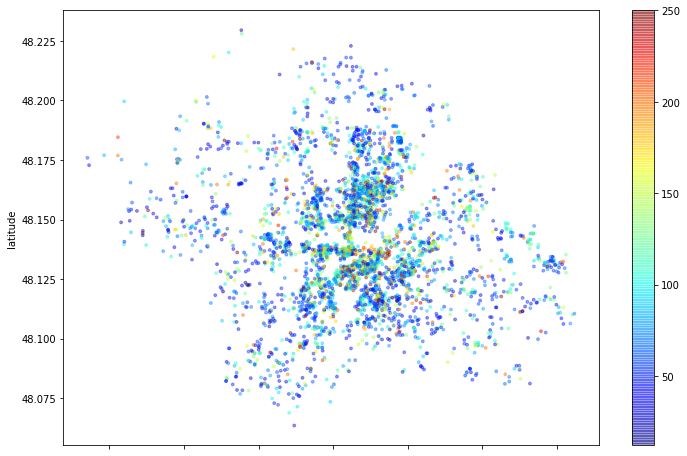

In [ ]:
# plotar os imóveis pela latitude/longitude e valor
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

De modo geral, a cidade de Munique demonstra uma ampla heterogeneidade de valores. Podemos encontrar tanto valores baixos quanto altos nas mais diversas localidades, indicando que os tipos de acomodações são bem diversificados em toda a região.

Em média, uma pessoa que deseja se hospedar na cidade deverá gastar 94,00 euros por noite. O bairro que apresentou o menor custo médio foi Hadern e o de maior custo médio foi Altstadt-Lehel. O tipo de acomodação mais comum é `Entire home/apt`.

Apesar de ter sido feito o tratamento de dados e remoção de outliers, nesse projeto ainda não nos preocupamos em criar um modelo de machine learning. No entanto, futuramente, pode-se desenvolver tal ferramenta como forma de prever o valor final de um imóvel a partir de variáveis como: localização, latitude, longitude, distância, vizinhança e número mínimo de noites.